In [1]:
# Loading the Data into the Notebook

In [2]:
import csv
import pandas

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
biodegs = fetch_openml(name = 'qsar-biodeg')

In [5]:
# Split Data into Test and Train Sets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(biodegs.data, biodegs.target, random_state=20)

In [8]:
# Initialize K-Nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn1 = KNeighborsClassifier()

In [11]:
knn1.fit(X=X_train,y=y_train)

KNeighborsClassifier()

In [12]:
# Prections for the Test Set

In [13]:
predictions = knn1.predict(X=X_test)

In [14]:
import numpy

In [15]:
actuals = numpy.array(y_test)

In [16]:
predictions[:20]

array(['2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '2', '1',
       '1', '1', '2', '1', '1', '2', '2'], dtype=object)

In [17]:
actuals

array(['2', '1', '2', '1', '1', '2', '1', '1', '2', '1', '1', '2', '1',
       '1', '1', '2', '1', '1', '2', '2', '1', '1', '1', '2', '1', '2',
       '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1',
       '1', '1', '2', '1', '2', '2', '1', '1', '1', '2', '1', '1', '2',
       '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1', '2',
       '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '1', '2', '1',
       '2', '1', '2', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2',
       '2', '1', '1', '1', '1', '2', '1', '2', '2', '2', '1', '1', '1',
       '1', '2', '1', '1', '1', '2', '1', '1', '1', '2', '1', '1', '1',
       '1', '1', '2', '1', '2', '2', '1', '2', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '2', '2', '1', '1', '1', '1', '1', '1

In [18]:
actuals[:20]

array(['2', '1', '2', '1', '1', '2', '1', '1', '2', '1', '1', '2', '1',
       '1', '1', '2', '1', '1', '2', '2'], dtype=object)

In [19]:
wrong = [(p,e) for (p,e) in zip(predictions, actuals) if p!=e]

In [20]:
len(wrong)

55

In [21]:
len(actuals)

264

In [22]:
55/264

0.20833333333333334

In [23]:
print(f'{knn1.score(X_test,y_test):.2%}')

79.17%


In [24]:
#Form a Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion = confusion_matrix(y_true=actuals,y_pred=predictions)

In [27]:
confusion

array([[153,  31],
       [ 24,  56]], dtype=int64)

In [28]:
#Create a Classification Report

In [29]:
from sklearn.metrics import classification_report

In [30]:
names1 = [str(biodeg) for biodeg in biodegs.target_names]

In [31]:
print(classification_report(actuals,predictions))

              precision    recall  f1-score   support

           1       0.86      0.83      0.85       184
           2       0.64      0.70      0.67        80

    accuracy                           0.79       264
   macro avg       0.75      0.77      0.76       264
weighted avg       0.80      0.79      0.79       264



In [32]:
# Heatmap Attempt

In [33]:
confusion_df = pandas.DataFrame(confusion, index=range(2),
                                columns = range(2))

In [34]:
import seaborn as sns

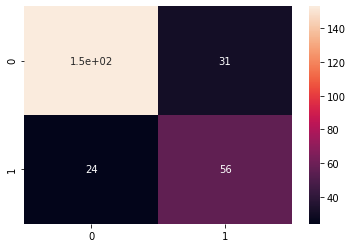

In [35]:
axes = sns.heatmap(confusion_df,annot=True)

In [36]:
# Implement K-Fold Crossvalidation

In [37]:
from sklearn.model_selection import KFold

In [38]:
kfold = KFold(n_splits=10,random_state=11,shuffle = True)

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
scores = cross_val_score(estimator=knn1, X=biodegs.data, y = biodegs.target, cv = kfold)

In [41]:
scores

array([0.81132075, 0.79245283, 0.83962264, 0.90566038, 0.77358491,
       0.79047619, 0.85714286, 0.77142857, 0.81904762, 0.81904762])

In [42]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 81.80%


In [43]:
# Testing with Different Estimators

In [67]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier

In [68]:
estimators = {
    'KNeighborsClassifier': knn1,
    'SVC': SVC(gamma = 'scale'),
    'GaussianNB': GaussianNB(),
    'SGD Classifier':SGDClassifier(),
    'Nearest Centroid':NearestCentroid(),
    'Ridge Classification':linear_model.RidgeCV(),
    'Neural Network':MLPClassifier()}

In [69]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state =20, shuffle = True)
    scores = cross_val_score(estimator=estimator_object, X=biodegs.data, y=biodegs.target, cv=kfold)
    print(f'{estimator_name:>20}:' +
          f'mean accuracy = {scores.mean():.2%}; ' +
          f'standard deviation = {scores.std():.2%}')

KNeighborsClassifier:mean accuracy = 81.81%; standard deviation = 3.54%
                 SVC:mean accuracy = 81.89%; standard deviation = 2.20%
          GaussianNB:mean accuracy = 71.57%; standard deviation = 4.33%
      SGD Classifier:mean accuracy = 78.78%; standard deviation = 6.51%
    Nearest Centroid:mean accuracy = 65.22%; standard deviation = 4.68%
Ridge Classification:mean accuracy = 43.27%; standard deviation = 9.96%


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

      Neural Network:mean accuracy = 87.21%; standard deviation = 2.53%


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [70]:
# Tuning one of the Hyperparameters of KNN (k)

In [71]:
for k in range (1,20,2):
    kfold = KFold(n_splits=10, random_state =20, shuffle = True)
    knn1 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn1,
                            X=biodegs.data, y=biodegs.target, cv=kfold)
    print(f'k{k:<2}; mean accuracy = {scores.mean():.2%}; ' +
         f'standard deviation = {scores.std():.2%}')

k1 ; mean accuracy = 78.97%; standard deviation = 3.10%
k3 ; mean accuracy = 82.09%; standard deviation = 2.66%
k5 ; mean accuracy = 81.81%; standard deviation = 3.54%
k7 ; mean accuracy = 82.19%; standard deviation = 3.92%
k9 ; mean accuracy = 82.00%; standard deviation = 3.68%
k11; mean accuracy = 80.67%; standard deviation = 3.49%
k13; mean accuracy = 80.48%; standard deviation = 3.60%
k15; mean accuracy = 80.10%; standard deviation = 3.78%
k17; mean accuracy = 79.63%; standard deviation = 3.87%
k19; mean accuracy = 79.15%; standard deviation = 3.64%


In [72]:
# Changing around the Defaults of Neural Network Implementation

In [83]:
kfold = KFold(n_splits=10, random_state =20, shuffle = True)
scores = cross_val_score(estimator=MLPClassifier( ),
                        X=biodegs.data, y=biodegs.target, cv=kfold)
print(f'k{k:<2}; mean accuracy = {scores.mean():.2%}; ' +
     f'standard deviation = {scores.std():.2%}')

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

k19; mean accuracy = 87.48%; standard deviation = 2.09%


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
